In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
csv_path = '/content/drive/MyDrive/animal classification/' # changed to MyDrive
filename = 'zoo2.csv'
df = pd.read_csv(csv_path + filename)
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type,type_name
0,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,Mammal
1,lion,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,Mammal
2,chicken,0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,0,2,Bird
3,duck,0,1,1,0,1,1,0,0,1,1,0,0,2,1,0,0,2,Bird
4,seasnake,0,0,0,0,0,1,1,1,1,0,1,0,0,1,0,0,3,Reptile


In [ ]:
df.drop(['animal_name','type_name'], axis=1, inplace=True)

In [ ]:
x = df.drop('class_type', axis=1)
y = df['class_type']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
model.score(X_test, y_test)

0.3333333333333333

In [ ]:
y_hat_value = model.predict(X_test)

In [ ]:
y_hat_value

array([3, 6, 5])

In [ ]:
y_test_value = y_test.values
print('actual' ,y_test_value)
print('predicted' ,y_hat_value)

actual [5 6 1]
predicted [3 6 5]


In [ ]:
def totype(num):
  num_class = [1,2,3,4,5,6,7]
  class_name = ['Mammal', 'Bird', 'Reptile', 'Fish', 'Amphibian', 'Bug', 'Invertebrate']
  return class_name[num-1]

In [ ]:
animals1 = np.array([totype(y) for y in y_test_value])
print('display the actual class', animals1)
animals2 = np.array([totype(y) for y in y_hat_value])
print('display the predicted class', animals2)

display the actual class ['Amphibian' 'Bug' 'Mammal']
display the predicted class ['Reptile' 'Bug' 'Amphibian']


In [ ]:
all_classes = ['Mammal', 'Bird', 'Reptile', 'Fish', 'Amphibian', 'Bug', 'Invertebrate']
class_mapping = {i+1: all_classes[i] for i in range(len(all_classes))}

In [ ]:
y_test_value_relabel = [class_mapping[val] for val in y_test_value]
y_hat_value_relabel = [class_mapping[val] for val in y_hat_value]

In [ ]:
from collections import Counter
c = Counter(zip(y_test_value_relabel, y_hat_value_relabel))

s = [10 *c.get((x1,y1),0) for x1 in all_classes for y1 in all_classes]
s= np.array(s).reshape(len(all_classes), len(all_classes))


<ipython-input-117-fb4efa51c141>:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(np.repeat(all_classes, len(all_classes)), np.tile(all_classes, len(all_classes)), s = s.flatten(), alpha = 1 , cmap='Blues')


Text(0, 0.5, 'Predicted')

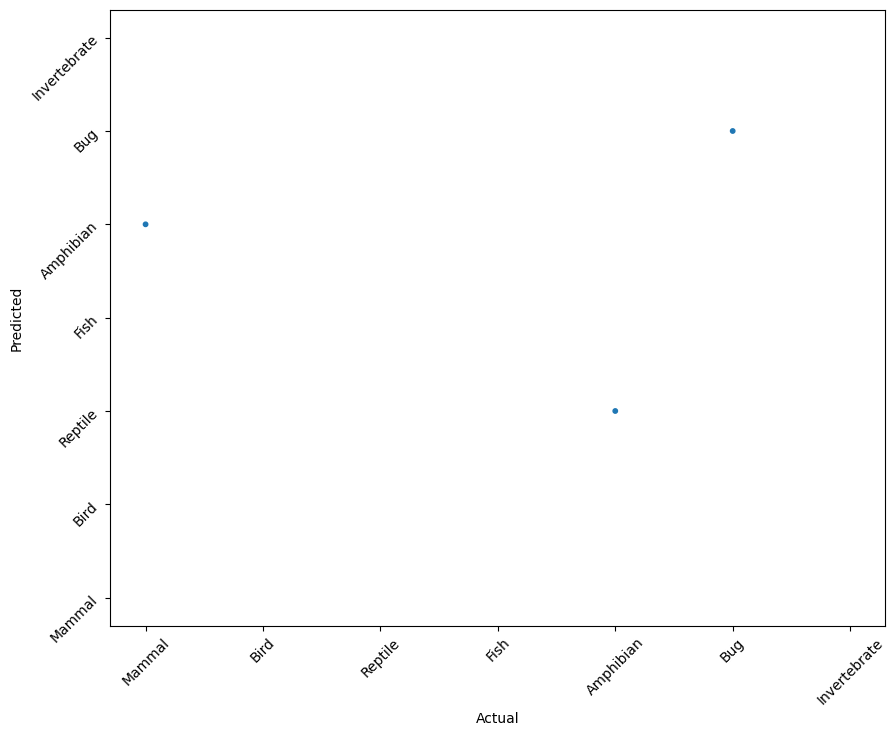

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(np.repeat(all_classes, len(all_classes)), np.tile(all_classes, len(all_classes)), s = s.flatten(), alpha = 1 , cmap='Blues')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [ ]:
def find_index(index):
  count = 0
  for original_index , value in y_test.items():
    if count == index:
      return original_index
    count += 1

def find_animal(index):
  try:
    animal = df.iloc[find_index(index)]
    return animal
  except:
    return None


In [ ]:
different_indices = np.where(y_test_value != y_hat_value)[0]
print('indices where numbers are different', different_indices)

indices where numbers are different [0 2]


In [ ]:
def classified(index):
  animal_info = find_animal(index)
  animal = animal_info[0]
  real = totype(animal_info[16])
  classified_class = totype(y_hat_value[index])

  print(animal , "is a", real, 'and was classified as a', classified_class)

In [ ]:
print("These are all the animals that were misclassified:\n")
for i in range(0,len(different_indices)):
  classified(different_indices[i])

These are all the animals that were misclassified:

0 is a Amphibian and was classified as a Reptile
1 is a Mammal and was classified as a Amphibian


<ipython-input-120-80ee08b60621>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  animal = animal_info[0]
<ipython-input-120-80ee08b60621>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  real = totype(animal_info[16])


# Decision Tree Visualization


In [ ]:
feature_names = list(X_train.columns)
print(feature_names)


['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize']


In [ ]:
class_names = ['Mammal', 'Bird', 'Reptile', 'Fish', 'Amphibian', 'Bug', 'Invertebrate']
print(class_names)

['Mammal', 'Bird', 'Reptile', 'Fish', 'Amphibian', 'Bug', 'Invertebrate']


[Text(0.6666666666666666, 0.9166666666666666, 'fins <= 0.5\ngini = 0.843\nsamples = 11\nvalue = [1, 2, 2, 2, 1, 1, 2]\nclass = Bird'),
 Text(0.5555555555555556, 0.75, 'feathers <= 0.5\ngini = 0.815\nsamples = 9\nvalue = [1, 2, 2, 0, 1, 1, 2]\nclass = Bird'),
 Text(0.6111111111111112, 0.8333333333333333, 'True  '),
 Text(0.4444444444444444, 0.5833333333333334, 'backbone <= 0.5\ngini = 0.776\nsamples = 7\nvalue = [1, 0, 2, 0, 1, 1, 2]\nclass = Reptile'),
 Text(0.2222222222222222, 0.4166666666666667, 'airborne <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [0, 0, 0, 0, 0, 1, 2]\nclass = Invertebrate'),
 Text(0.1111111111111111, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 0, 0, 0, 2]\nclass = Invertebrate'),
 Text(0.3333333333333333, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 0, 1, 0]\nclass = Bug'),
 Text(0.6666666666666666, 0.4166666666666667, 'tail <= 0.5\ngini = 0.625\nsamples = 4\nvalue = [1, 0, 2, 0, 1, 0, 0]\nclass = Reptile'),
 Text(0.5555555555555556, 0.25, 'gini = 0.0

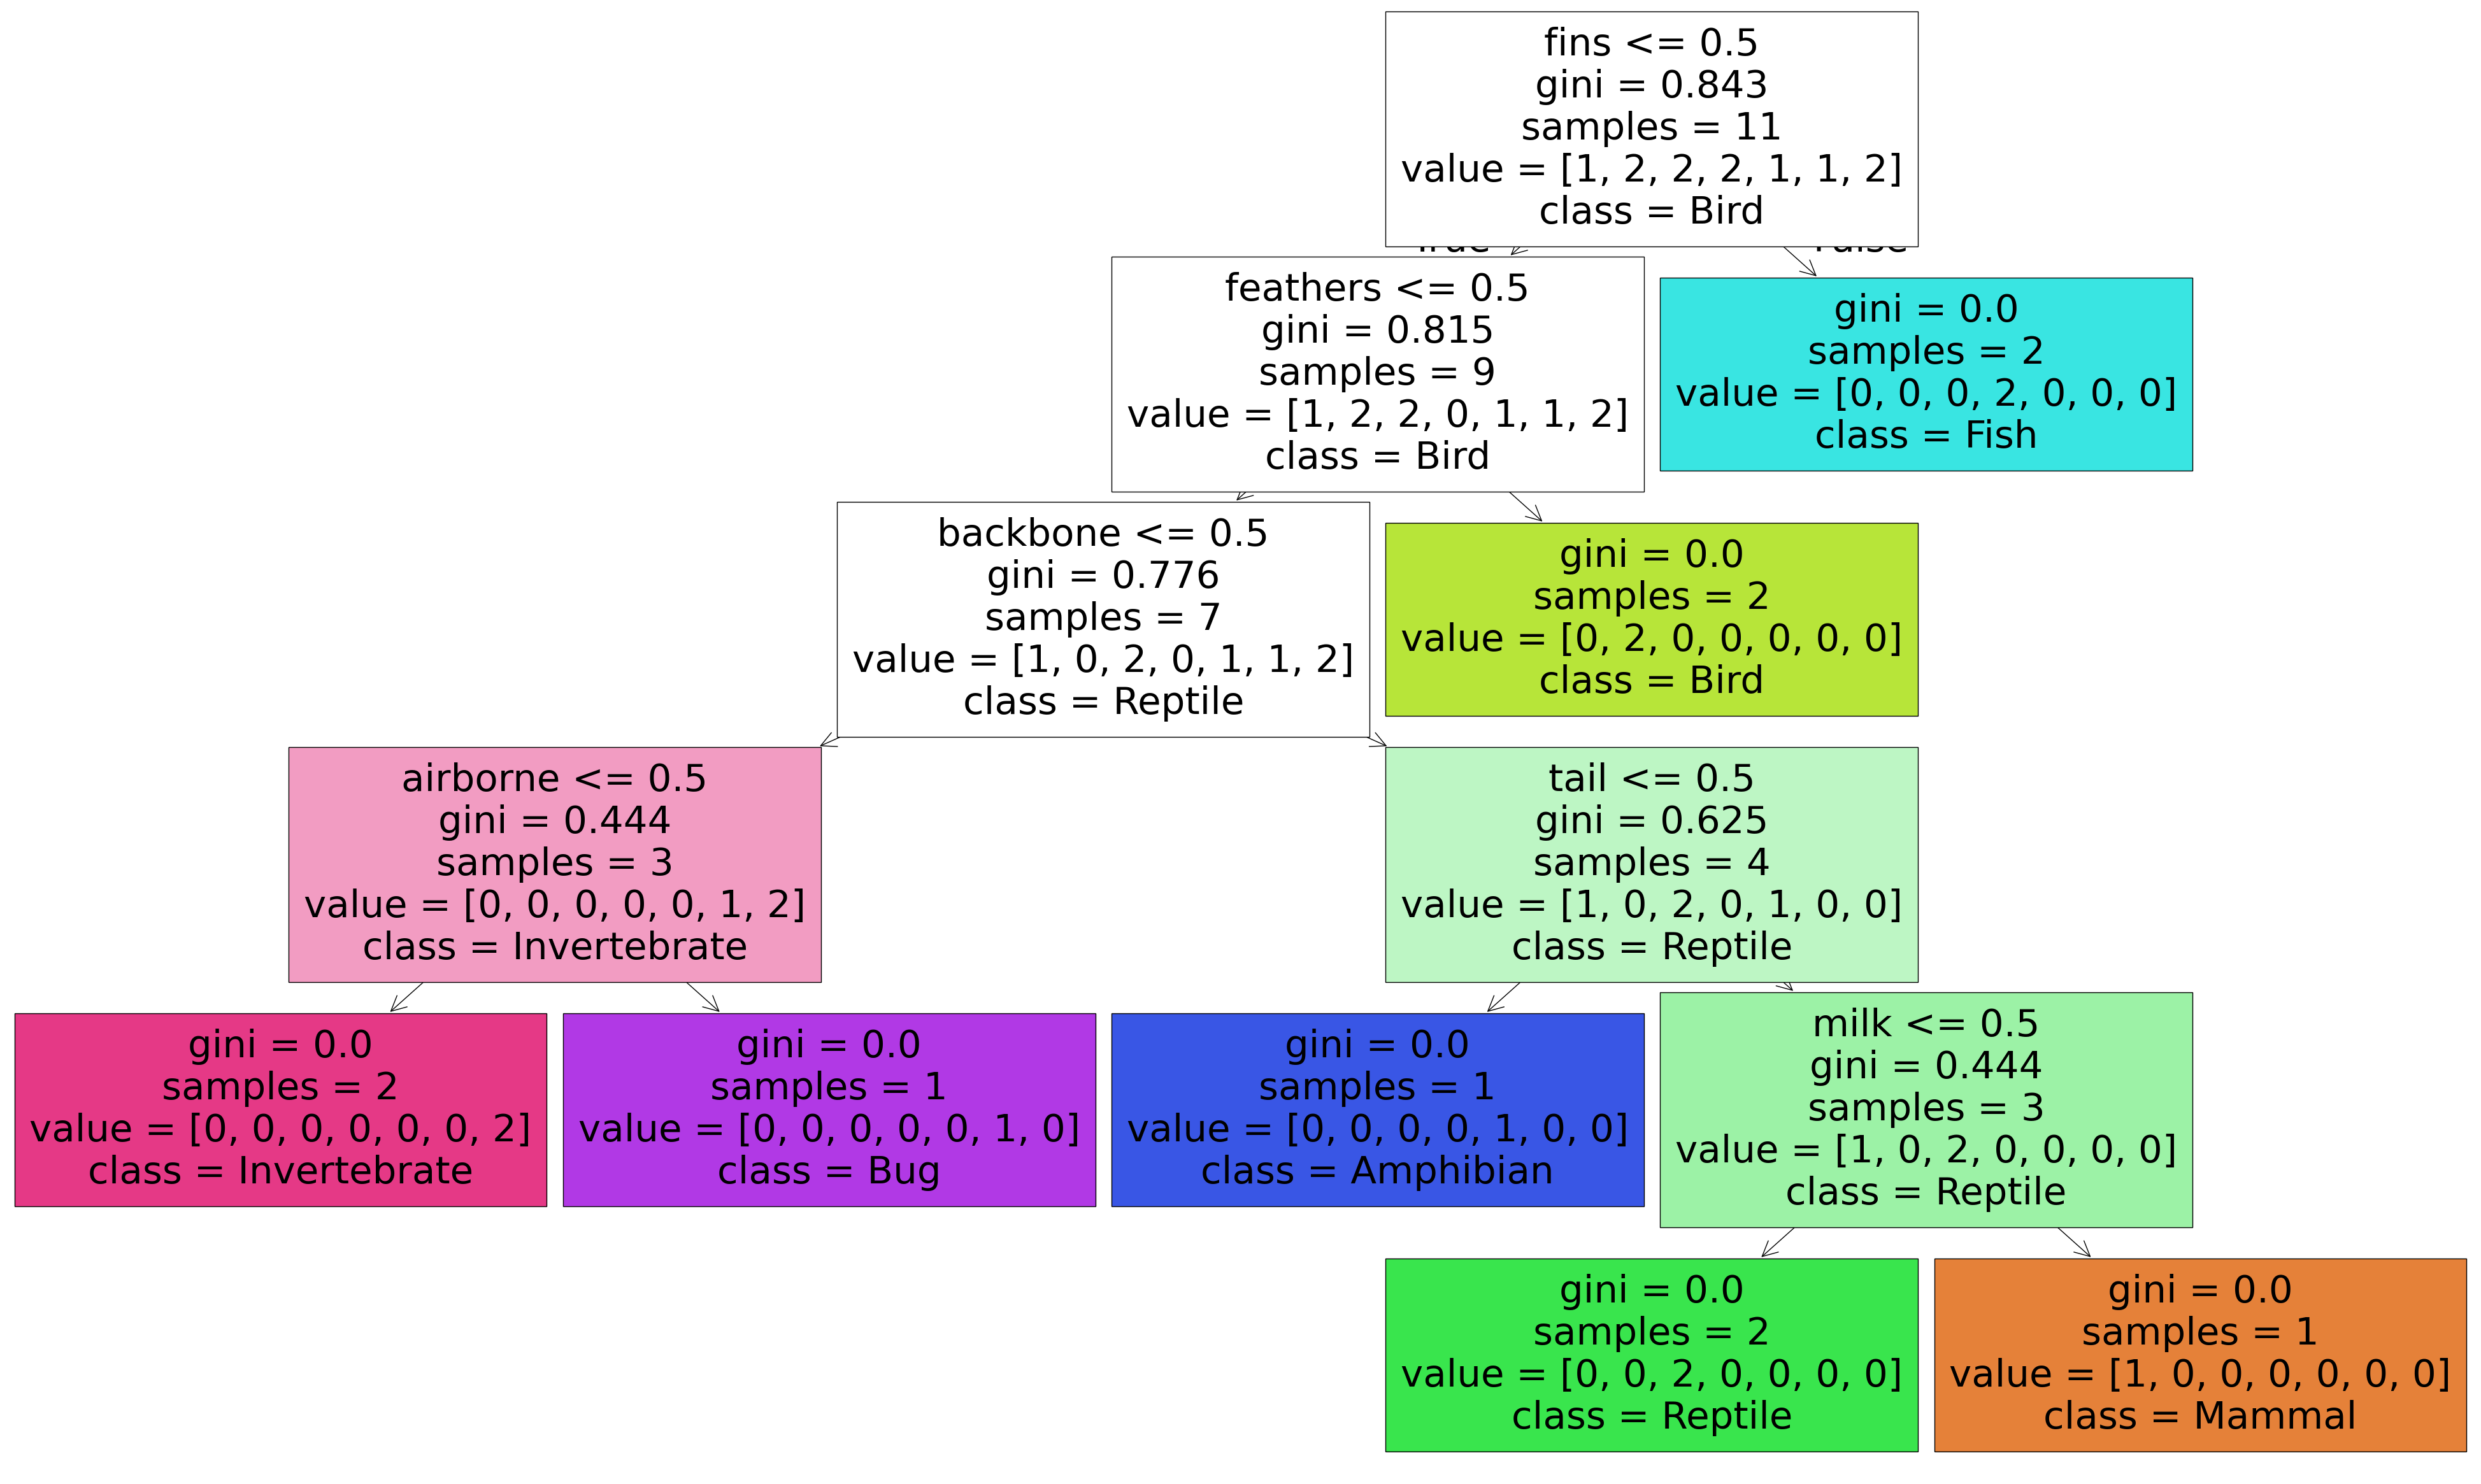

In [ ]:
fig = plt.figure(figsize=(50,30))
plot_tree(model,
                   feature_names=feature_names,
                   class_names=class_names,
                   filled=True)


In [ ]:
import pandas as pd
import random

class_mapping = {
    1: "Mammal",
    2: "Bird",
    3: "Reptile",
    4: "Fish",
    5: "Amphibian",
    6: "Bug",
    7: "Invertebrate"
}

possible_legs = [0, 2, 4, 6, 8]

# Sample lists of animal names (100+ names for each class)
Mammal = [
    "Lion", "Tiger", "Elephant", "Cheetah", "Leopard", "Giraffe", "Zebra", "Horse",
    "Wolf", "Fox", "Bear", "Panda", "Kangaroo", "Koala", "Otter", "Badger", "Bison",
    "Camel", "Chimpanzee", "Deer", "Dolphin", "Elk", "Hippopotamus", "Hyena", "Jaguar",
    "Lemur", "Llama", "Mink", "Moose", "Mule", "Narwhal", "Opossum", "Orangutan", "Ox",
    "Porcupine", "Prairie Dog", "Raccoon", "Rhinoceros", "Seal", "Squirrel", "Walrus",
    "Wolverine", "Yak", "Antelope", "Beaver", "Boar", "Buffalo", "Caribou", "Cougar",
    "Coyote", "Dugong", "Gazelle", "Hedgehog", "Jackal", "Kudu", "Marten", "Mole",
    "Muskrat", "Puma", "Reindeer", "Serval", "Tapir", "Vicuña", "Wallaby", "Warthog",
    "Weasel", "Whale", "Zebu", "Alpaca", "Baboon", "Bighorn", "Bobcat", "Chamois",
    "Civet", "Dhole", "Dromedary", "Eland", "Fossa", "Galago", "Gerenuk", "Gibbon",
    "Ibex", "Impala", "Kinkajou", "Lynx", "Markhor", "Muskox", "Numbat", "Okapi",
    "Pangolin", "Quokka", "Serval", "Tamarin", "Tarsier", "Wombat", "Zorilla"
]

Bird = [
    "Eagle", "Sparrow", "Parrot", "Owl", "Flamingo", "Penguin", "Hawk", "Seagull",
    "Woodpecker", "Pelican", "Crow", "Pigeon", "Dove", "Kingfisher", "Heron", "Vulture",
    "Canary", "Albatross", "Condor", "Swallow", "Starling", "Robin", "Magpie",
    "Cockatoo", "Toucan", "Quail", "Swan", "Goose", "Duck", "Pheasant", "Cormorant",
    "Bird-of-paradise", "Buzzard", "Crane", "Kookaburra", "Lorikeet", "Nightingale",
    "Oriole", "Osprey", "Pelican", "Raven", "Sandpiper", "Skylark", "Tern", "Warbler",
    "Woodcock", "Wren", "Cuckoo", "Drongo", "Eider", "Falcon", "Grouse", "Hummingbird",
    "Ibis", "Jacana", "Junco", "Lapwing", "Lark", "Manakin", "Nuthatch", "Ornithologist",
    "Oystercatcher", "Potoo", "Rail", "Sapsucker", "Shrike", "Snipe", "Stilt", "Sunbird",
    "Trogon", "Vireo", "Wagtail", "Waxwing", "Zebra Finch", "Snowy Owl", "Great Horned Owl",
    "Bald Eagle", "Golden Eagle", "Red-tailed Hawk", "Peregrine Falcon", "American Robin",
    "Blue Jay", "Northern Cardinal", "House Finch", "European Starling", "American Crow",
    "Common Raven", "Barn Owl", "Eastern Bluebird", "Ruby-throated Hummingbird", "Great Blue Heron",
    "Sandhill Crane", "Canada Goose", "Mallard", "Northern Pintail"
]

Reptile = [
    "Crocodile", "Alligator", "Lizard", "Gecko", "Chameleon", "Iguana", "Komodo Dragon",
    "Python", "Boa", "Anole", "Garter Snake", "Rattlesnake", "Turtle", "Tortoise",
    "Monitor Lizard", "Skink", "Viper", "Sea Turtle", "Horned Lizard", "Glass Lizard",
    "Water Moccasin", "Cottonmouth", "King Cobra", "Gila Monster", "Copperhead", "Black Mamba",
    "Green Anole", "Brown Tree Snake", "Flying Dragon", "Desert Tortoise", "Softshell Turtle",
    "Diamondback", "Ribbon Snake", "Western Fence Lizard", "Eastern Box Turtle", "Banded Gecko",
    "Caiman", "Mangrove Monitor", "Ringneck Snake", "Night Snake", "Coachwhip", "Smooth Green Snake",
    "Corn Snake", "Bullsnake", "Bullfrog (technically amphibian)", "Spiny-tailed Lizard", "Glass Snake",
    "Water Dragon", "Desert Iguana", "Alligator Snapping Turtle", "Sidewinder", "Horned Toad",
    "Leopard Gecko", "Texas Horned Lizard", "Mediterranean House Gecko", "Boa Constrictor",
    "Puff Adder", "False Gila", "Eastern Indigo Snake", "Sonoran Gopher Snake", "King Rat Snake",
    "Boomslang", "Bush Viper", "African Rock Python", "Black-headed Python", "Green Tree Python",
    "Yellow Anaconda", "Yellow-spotted Gecko", "Eastern Racer", "Rough Green Snake", "African Rock Monitor",
    "Desert Monitor", "Spiny-tailed Monitor", "Tegu", "Armored Lizard", "Flying Gecko", "Tokay Gecko",
    "Madagascar Ground Boa", "Emerald Tree Boa", "Rainbow Boa", "Green Basilisk", "Helmeted Iguana",
    "Mexican Beaded Lizard", "Chinese Water Dragon", "Frilled Lizard", "Chinese Cobra", "Saharan Horned Viper",
    "Bushmaster", "Mangshan Viper", "Cape Cobra", "Boomslang Snake", "Side-necked Turtle", "Softshell Turtle"
]

Fish = [
    "Salmon", "Trout", "Goldfish", "Carp", "Tuna", "Cod", "Catfish", "Clownfish",
    "Guppy", "Bass", "Pufferfish", "Angelfish", "Betta", "Swordfish", "Sturgeon",
    "Barracuda", "Herring", "Marlin", "Mackerel", "Perch", "Pike", "Pollock", "Snapper",
    "Swordfish", "Tilapia", "Walleye", "Zebrafish", "Grouper", "Haddock", "Lionfish",
    "Mahi Mahi", "Moray Eel", "Needlefish", "Oscar", "Parrotfish", "Rainbow Trout",
    "Sailfish", "Scorpionfish", "Seahorse", "Shark", "Smelt", "Sunfish", "Tarpon",
    "Triggerfish", "Wobbegong", "Wrasse", "Yellowtail", "Zander", "Anchovy", "Blowfish",
    "Chub", "Damselfish", "Darter", "Dogfish", "Electric Eel", "Flounder", "Flying Fish",
    "Garfish", "Hagfish", "Icefish", "Jawfish", "Killifish", "Loach", "Lumpfish", "Mudskipper",
    "Nurse Shark", "Orange Roughy", "Pikeperch", "Queen Angelfish", "Rainbowfish",
    "Rockfish", "Sculpin", "Smoker", "Swordfish", "Tench", "Tilefish", "Weever", "Whiting"
]

Amphibian = [
    "Frog", "Toad", "Salamander", "Newt", "Caecilian", "Axolotl", "Bullfrog", "Tree Frog",
    "Glass Frog", "Spadefoot Toad", "Fire Salamander", "Tiger Salamander", "Olm",
    "Marbled Salamander", "Mudpuppy", "Pacific Tree Frog", "Poison Dart Frog",
    "Tomato Frog", "Golden Frog", "Green Frog", "Pickerel Frog", "Leopard Frog",
    "Mountain Yellow-legged Frog", "Japanese Giant Salamander", "Eastern Newt",
    "African Clawed Frog", "Cane Toad", "European Common Frog", "Northern Leopard Frog",
    "Wood Frog", "Yellow-bellied Toad", "Surinam Toad", "Darwin's Frog", "Dusky Salamander",
    "Flat-headed Salamander", "Four-toed Salamander", "Green Salamander", "Hellbender",
    "Jefferson Salamander", "Long-tailed Salamander", "Marbled Newt", "Red Salamander",
    "Ringed Salamander", "Southern Torrent Salamander", "Titicaca Water Frog",
    "Two-toed Amphiuma", "Western Toad", "Yangtze Giant Softshell Turtle", "Zebra Newt",
    "African Bullfrog", "Amazon Milk Frog", "Anura", "Banded Bullfrog", "Burmese Mountain Toad",
    "Clawed Frog", "Common Midwife Toad", "Dwarf African Frog", "European Fire-bellied Toad",
    "Giant Tree Frog", "Green Tree Frog", "Mountain Chicken", "Panamanian Golden Frog",
    "Purple Frog", "Spotted Salamander", "Spring Peeper", "Yellow-spotted Amazon River Frog",
    "Yellow-bellied Tree Frog", "Yellow-legged Frog", "Amazon Horned Frog",
    "Asian Common Toad", "Barking Tree Frog", "Boreal Chorus Frog", "California Newt",
    "Chinese Giant Salamander", "Cuban Tree Frog", "Eastern Spadefoot Toad", "Fowler's Toad",
    "Golden Coquí", "Great Crested Newt", "Hawaiian Coquí", "Marbled Salamander", "Pacific Tree Frog",
    "Pickerel Frog", "Siberian Salamander", "Western Chorus Frog", "Yellow-banded Poison Dart Frog"
]

Insect = [
    "Ant", "Bee", "Butterfly", "Beetle", "Cockroach", "Dragonfly", "Fly", "Grasshopper",
    "Ladybug", "Mosquito", "Moth", "Praying Mantis", "Termite", "Wasp", "Cicada",
    "Firefly", "Flea", "Gnat", "Hornet", "Katydid", "Leafhopper", "Lice", "Mayfly",
    "Sawfly", "Silverfish", "Stinkbug", "Walking Stick", "Weevil", "Bumblebee",
    "Carpenter Ant", "Dung Beetle", "Earwig", "Fire Ant", "Glowworm", "Hornet",
    "Housefly", "Ichneumon Wasp", "Japanese Beetle", "Leaf Beetle", "Longhorn Beetle",
    "Midge", "Mountain Pine Beetle", "Paper Wasp", "Pill Bug", "Robber Fly", "Scarab Beetle",
    "Skipper Butterfly", "Spittlebug", "Springtail", "Tarantula Hawk", "Thrips",
    "Velvet Ant", "Water Strider", "Yellowjacket", "Zebra Butterfly", "Caddisfly",
    "Click Beetle", "Cucumber Beetle", "Dobsonfly", "Dung Fly", "Gall Midge", "Giant Water Bug",
    "Glow-worm Beetle", "Gorse Shieldbug", "Harlequin Bug", "Horsefly", "Ichneumon Fly",
    "Jewel Beetle", "Ladybird Beetle", "Lacewing", "Leafcutter Ant", "Mole Cricket",
    "Mud Dauber", "Net-winged Beetle", "Owl Butterfly", "Pine Sawfly", "Pseudoscorpion",
    "Rove Beetle", "Sawyer Beetle", "Sawfly Larvae", "Scorpionfly", "Spotted Lanternfly",
    "Tiger Moth", "Twice-stabbed Lady Beetle", "Velvet Beetle", "Whirligig Beetle", "Yellow Sac Spider"
]

Invertebrate = [
    "Octopus", "Squid", "Jellyfish", "Starfish", "Sea Urchin", "Crab", "Lobster",
    "Shrimp", "Barnacle", "Sea Cucumber", "Anemone", "Clam", "Oyster", "Mussel",
    "Scallop", "Worm", "Coral", "Leech", "Slug", "Snail", "Flatworm", "Hydra",
    "Sea Slug", "Spiny Lobster", "Sea Spider", "Wood"]

animal_name = [Mammal, Bird, Reptile,Fish, Amphibian, Insect, Invertebrate]
animal_type = [1,2,3,4,5,6,7]
animal_name

[['Lion',
  'Tiger',
  'Elephant',
  'Cheetah',
  'Leopard',
  'Giraffe',
  'Zebra',
  'Horse',
  'Wolf',
  'Fox',
  'Bear',
  'Panda',
  'Kangaroo',
  'Koala',
  'Otter',
  'Badger',
  'Bison',
  'Camel',
  'Chimpanzee',
  'Deer',
  'Dolphin',
  'Elk',
  'Hippopotamus',
  'Hyena',
  'Jaguar',
  'Lemur',
  'Llama',
  'Mink',
  'Moose',
  'Mule',
  'Narwhal',
  'Opossum',
  'Orangutan',
  'Ox',
  'Porcupine',
  'Prairie Dog',
  'Raccoon',
  'Rhinoceros',
  'Seal',
  'Squirrel',
  'Walrus',
  'Wolverine',
  'Yak',
  'Antelope',
  'Beaver',
  'Boar',
  'Buffalo',
  'Caribou',
  'Cougar',
  'Coyote',
  'Dugong',
  'Gazelle',
  'Hedgehog',
  'Jackal',
  'Kudu',
  'Marten',
  'Mole',
  'Muskrat',
  'Puma',
  'Reindeer',
  'Serval',
  'Tapir',
  'Vicuña',
  'Wallaby',
  'Warthog',
  'Weasel',
  'Whale',
  'Zebu',
  'Alpaca',
  'Baboon',
  'Bighorn',
  'Bobcat',
  'Chamois',
  'Civet',
  'Dhole',
  'Dromedary',
  'Eland',
  'Fossa',
  'Galago',
  'Gerenuk',
  'Gibbon',
  'Ibex',
  'Impala',
  

In [ ]:
import pandas as pd
import random

# Mapping of class_type to type_name
class_mapping = {
    1: "Mammal",
    2: "Bird",
    3: "Reptile",
    4: "Fish",
    5: "Amphibian",
    6: "Bug",
    7: "Invertebrate"
}

possible_legs = [0, 2, 4, 6, 8]

data = []

        # Define features based on class_type for realism
hair = int(class_type == 1 and random.random() > 0.2)
feathers = int(class_type == 2)
eggs = int(class_type != 1)
milk = int(class_type == 1)
airborne = int(class_type == 2 and random.random() > 0.3)
aquatic = int(class_type in [4, 5] and random.random() > 0.2)
predator = random.randint(0, 1)
toothed = int(class_type in [1, 3, 4, 5])
backbone = int(class_type in [1, 2, 3, 4, 5])
breathes = 1
venomous = int(random.random() > 0.85)
fins = int(class_type == 4)
legs = random.choice(possible_legs)
tail = random.randint(0, 1)
domestic = int(random.random() > 0.85)
catsize = int(class_type == 1 and random.random() > 0.7)

record = {
            "animal_name": animal_name,
            "hair": hair,
            "feathers": feathers,
            "eggs": eggs,
            "milk": milk,
            "airborne": airborne,
            "aquatic": aquatic,
            "predator": predator,
            "toothed": toothed,
            "backbone": backbone,
            "breathes": breathes,
            "venomous": venomous,
            "fins": fins,
            "legs": legs,
            "tail": tail,
            "domestic": domestic,
            "catsize": catsize,
            "class_type": class_type,
            "type_name": type_name
        }
data.append(record)

# Create DataFrame
zoo_df = pd.DataFrame(data)

# Export to CSV
zoo_df.to_csv("zoo_dataset.csv", index=False)

print("Zoo dataset with 700 records generated and saved as 'zoo_dataset.csv'")


Zoo dataset with 700 records generated and saved as 'zoo_dataset.csv'


In [ ]:
# prompt: in zoo_dataset the only animal_name has a records all the features have empty records means missing data . generate a realistic type  data for my project

import pandas as pd
import random

# ... (Your existing code) ...

# Generate realistic data for the zoo dataset
num_records = 700  # Generate 700 records
data = []

for _ in range(num_records):
    class_type = random.randint(1, 7)
    type_name = class_mapping.get(class_type)
    animal_name = [Mammal, Bird, Reptile,Fish, Amphibian, Insect, Invertebrate]
    # Define features based on class_type for realism
    hair = int(class_type == 1 and random.random() > 0.2)
    feathers = int(class_type == 2)
    eggs = int(class_type != 1)
    milk = int(class_type == 1)
    airborne = int(class_type == 2 and random.random() > 0.3)
    aquatic = int(class_type in [4, 5] and random.random() > 0.2)
    predator = random.randint(0, 1)
    toothed = int(class_type in [1, 3, 4, 5])
    backbone = int(class_type in [1, 2, 3, 4, 5])
    breathes = 1
    venomous = int(random.random() > 0.85)
    fins = int(class_type == 4)
    legs = random.choice(possible_legs)
    tail = random.randint(0, 1)
    domestic = int(random.random() > 0.85)
    catsize = int(class_type == 1 and random.random() > 0.7)

    record = {
        "animal_name": animal_name,
        "hair": hair,
        "feathers": feathers,
        "eggs": eggs,
        "milk": milk,
        "airborne": airborne,
        "aquatic": aquatic,
        "predator": predator,
        "toothed": toothed,
        "backbone": backbone,
        "breathes": breathes,
        "venomous": venomous,
        "fins": fins,
        "legs": legs,
        "tail": tail,
        "domestic": domestic,
        "catsize": catsize,
        "class_type": class_type,
        "type_name": type_name
    }
    data.append(record)

# Create DataFrame
zoo_df = pd.DataFrame(data)

# Export to CSV
zoo_df.to_csv("zoo_dataset.csv", index=False)

print("Zoo dataset with 700 records generated and saved as 'zoo_dataset.csv'")


Zoo dataset with 700 records generated and saved as 'zoo_dataset.csv'


In [ ]:
# prompt: add random data in every feature except animal name to avoid null  values in zoo_dataset.csv

import pandas as pd
import random

# Load the CSV file
df = pd.read_csv('zoo_dataset.csv')

# Iterate through each row and fill missing values with random data
for index, row in df.iterrows():
    for column in df.columns:
        if column != 'animal_name' and pd.isnull(row[column]):
            if df[column].dtype == 'int64':
                # Generate a random integer within the range of existing values for the column
                min_val = df[column].min()
                max_val = df[column].max()
                df.loc[index, column] = random.randint(min_val, max_val)
            elif df[column].dtype == 'object':
                # Generate a random value from the unique values of the column
                unique_vals = df[column].unique()
                df.loc[index, column] = random.choice(unique_vals)

# Save the updated DataFrame to a new CSV file
df.to_csv('zoo_dataset_filled.csv', index=False)
print("Filled missing values and saved as 'zoo_dataset_filled.csv'")


Filled missing values and saved as 'zoo_dataset_filled.csv'


In [ ]:
import pandas as pd
import numpy as np
import random

# Load your existing zoo dataset
df = pd.read_csv("zoo_dataset.csv")  # Make sure this file is in the same directory

# Mapping class_type with type_name
type_mapping = df[["class_type", "type_name"]].drop_duplicates().set_index("type_name")["class_type"].to_dict()
animal_types = list(type_mapping.keys())
feature_cols = df.columns[1:-2]  # skip animal_name and last two (class_type, type_name)

# Constants
total_records = 700
records_per_type = total_records // len(animal_types)
realistic_leg_counts = [0, 2, 4, 6, 8]

# Animal name templates
# realistic_names = {
#     "Mammal": ["Elephant", "Tiger", "Kangaroo", "Panda", "Giraffe", "Wolf", "Horse", "Goat", "Leopard", "Zebra"],
#     "Bird": ["Sparrow", "Owl", "Parrot", "Penguin", "Eagle", "Flamingo", "Duck", "Swan", "Falcon", "Crow"],
#     "Reptile": ["Cobra", "Iguana", "Gecko", "Tortoise", "Alligator", "Monitor", "Lizard", "Chameleon", "Python", "Viper"],
#     "Fish": ["Salmon", "Tuna", "Shark", "Goldfish", "Catfish", "Clownfish", "Angelfish", "Guppy", "Trout", "Swordfish"],
#     "Amphibian": ["Frog", "Toad", "Newt", "Salamander", "Caecilian", "TreeFrog", "Bullfrog", "Mudpuppy", "Axolotl", "FireSalamander"],
#     "Insect": ["Ant", "Bee", "Butterfly", "Moth", "Grasshopper", "Wasp", "Mosquito", "Beetle", "Dragonfly", "Ladybug"],
#     "Invertebrate": ["Octopus", "Jellyfish", "Starfish", "Coral", "Worm", "Leech", "Sponge", "Anemone", "SeaCucumber", "Crab"]
# }

# Animal name templates
realistic_names = {
    "Mammal": ["Elephant", "Tiger", "Kangaroo", "Panda", "Giraffe", "Wolf", "Horse", "Goat", "Leopard", "Zebra"],
    "Bird": ["Sparrow", "Owl", "Parrot", "Penguin", "Eagle", "Flamingo", "Duck", "Swan", "Falcon", "Crow"],
    "Reptile": ["Cobra", "Iguana", "Gecko", "Tortoise", "Alligator", "Monitor", "Lizard", "Chameleon", "Python", "Viper"],
    "Fish": ["Salmon", "Tuna", "Shark", "Goldfish", "Catfish", "Clownfish", "Angelfish", "Guppy", "Trout", "Swordfish"],
    "Amphibian": ["Frog", "Toad", "Newt", "Salamander", "Caecilian", "TreeFrog", "Bullfrog", "Mudpuppy", "Axolotl", "FireSalamander"],
    "Bug": ["Ant", "Bee", "Butterfly", "Moth", "Grasshopper", "Wasp", "Mosquito", "Beetle", "Dragonfly", "Ladybug"], # Added "Bug" key with sample names
    "Invertebrate": ["Octopus", "Jellyfish", "Starfish", "Coral", "Worm", "Leech", "Sponge", "Anemone", "SeaCucumber", "Crab"]
}

# Expand animal names
def expand_names(base_names, total):
    extended = []
    used = set()
    while len(extended) < total:
        for name in base_names:
            for i in range(1, 30):
                new_name = f"{name}_{i}"
                if new_name not in used:
                    used.add(new_name)
                    extended.append(new_name)
                    if len(extended) >= total:
                        break
            if len(extended) >= total:
                break
    return extended

# Generate synthetic dataset
records = []
for animal_type in animal_types:
    class_type = type_mapping[animal_type]
    base = df[df["type_name"] == animal_type]
    animal_names = expand_names(realistic_names[animal_type], records_per_type)

    for i in range(records_per_type):
        row = base.sample(1, replace=True).iloc[0]
        new_features = row[feature_cols].copy()

        binary_cols = [col for col in feature_cols if col != "legs"]
        flip_cols = np.random.choice(binary_cols, size=np.random.randint(2, 4), replace=False)
        new_features[flip_cols] = 1 - new_features[flip_cols]

        new_features["legs"] = random.choice(realistic_leg_counts)

        records.append({
            "animal_name": animal_names[i],
            **new_features.to_dict(),
            "class_type": class_type,
            "type_name": animal_type
        })

# Final cleanup
final_df = pd.DataFrame(records).drop_duplicates().sample(frac=1).reset_index(drop=True)
final_df = final_df.fillna(0)
final_df = final_df.iloc[:700]

# Save to CSV
final_df.to_csv("zoo_700_clean_animals.csv", index=False)
print("✅ zoo_700_clean_animals.csv created successfully!")


✅ zoo_700_clean_animals.csv created successfully!


In [ ]:
df = pd.read_csv('/content/zoo_cleaned.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/zoo_cleaned.csv'

In [ ]:
# prompt: perform deep eda on the dataset and apply decision tree classifier on the dataset

import matplotlib.pyplot as plt
# Display basic information about the dataset
df.info()
df.describe()

# Explore the distribution of features
for column in df.columns:
    if df[column].dtype == 'object':
        sns.countplot(x=column, data=df)
        plt.show()
    else:
        sns.histplot(df[column], kde=True)
        plt.show()

# # Analyze relationships between features and the target variable
for column in df.columns:
  if column != 'animal_name':
    sns.boxplot(x='animal_name', y=column, data=df)
    plt.show()


# Calculate and display the correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

# Identify and handle missing values (if any)
df.isnull().sum() # Check for missing values
# If missing values are present:
# df.fillna(df.mean(), inplace=True)  # Fill with mean for numerical columns
# df['column_name'].fillna(df['column_name'].mode()[0], inplace=True)  # Fill with mode for categorical


# Prepare the data for modeling
X = df.drop('animal_name', axis=1)
y = df['animal_name']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)  # You can adjust hyperparameters
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
x = df.drop('animal_name', axis=1)
y = df['animal_name']

In [ ]:
# prompt: apply decision tree classifier and also find the accuracy of the model after the prediction

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)
y_pred = dtree.predict(x_test)
print(accuracy_score(y_test, y_pred))


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [ ]:
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
# print("\nClassification Report:\n", classification_report(y_test, y_pred))
# print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

